In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_selection import RFE
import sklearn.metrics as metrics
import scipy.stats as ss
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
df= pd.read_excel("C:/Users/Predator/Desktop/TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx",sheet_name="Existing employees")
df_left= pd.read_excel("C:/Users/Predator/Desktop/TakenMind-Python-Analytics-Problem-case-study-1-1.xlsx",sheet_name="Employees who have left")

In [3]:
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,2001,0.58,0.74,4,215,3,0,0,sales,low
1,2002,0.82,0.67,2,202,3,0,0,sales,low
2,2003,0.45,0.69,5,193,3,0,0,sales,low
3,2004,0.78,0.82,5,247,3,0,0,sales,low
4,2005,0.49,0.60,3,214,2,0,0,sales,low


In [4]:
df_left.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [5]:
df.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000,11428.000000
mean,7812.340742,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
std,3453.947461,0.217104,0.162005,0.979884,45.682731,1.562348,0.379991,0.159889
min,2001.000000,0.120000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,4857.750000,0.540000,0.580000,3.000000,162.000000,2.000000,0.000000,0.000000
50%,7714.500000,0.690000,0.710000,4.000000,198.000000,3.000000,0.000000,0.000000
75%,10571.250000,0.840000,0.850000,4.000000,238.000000,4.000000,0.000000,0.000000
max,14211.000000,1.000000,1.000000,6.000000,287.000000,10.000000,1.000000,1.000000


In [6]:
df_left.describe()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
count,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000,3571.000000
mean,6500.439653,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321
std,6266.484705,0.263933,0.197673,1.818165,61.202825,0.977698,0.212364,0.072759
min,1.000000,0.090000,0.450000,2.000000,126.000000,2.000000,0.000000,0.000000
25%,893.500000,0.130000,0.520000,2.000000,146.000000,3.000000,0.000000,0.000000
50%,1786.000000,0.410000,0.790000,4.000000,224.000000,4.000000,0.000000,0.000000
75%,12678.500000,0.730000,0.900000,6.000000,262.000000,5.000000,0.000000,0.000000
max,14999.000000,0.920000,1.000000,7.000000,310.000000,6.000000,1.000000,1.000000


In [7]:
df.isnull().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

In [8]:
df_left.isnull().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
dtype: int64

In [9]:
df['Left']=0

In [10]:
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Left
0,2001,0.58,0.74,4,215,3,0,0,sales,low,0
1,2002,0.82,0.67,2,202,3,0,0,sales,low,0
2,2003,0.45,0.69,5,193,3,0,0,sales,low,0
3,2004,0.78,0.82,5,247,3,0,0,sales,low,0
4,2005,0.49,0.60,3,214,2,0,0,sales,low,0


In [11]:
df_left['Left']=1

In [12]:
len(df)

11428

In [13]:
len(df_left)

3571

In [14]:
df=df.append(df_left,ignore_index=True)

In [15]:
len(df)

14999

In [16]:
df['dept'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: dept, dtype: int64

In [17]:
df_left['dept'].value_counts()

sales          1014
technical       697
support         555
IT              273
hr              215
accounting      204
marketing       203
product_mng     198
RandD           121
management       91
Name: dept, dtype: int64

In [18]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [19]:
sal={'low':0, 'medium':1, 'high':2}
df['salary']=[sal[obj] for obj in df['salary']]

In [20]:
df.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Left
0,2001,0.58,0.74,4,215,3,0,0,sales,0,0
1,2002,0.82,0.67,2,202,3,0,0,sales,0,0
2,2003,0.45,0.69,5,193,3,0,0,sales,0,0
3,2004,0.78,0.82,5,247,3,0,0,sales,0,0
4,2005,0.49,0.60,3,214,2,0,0,sales,0,0


In [21]:
df=df.drop('Emp ID',axis=1)

In [22]:
df_left=df_left.drop('Emp ID',axis=1)

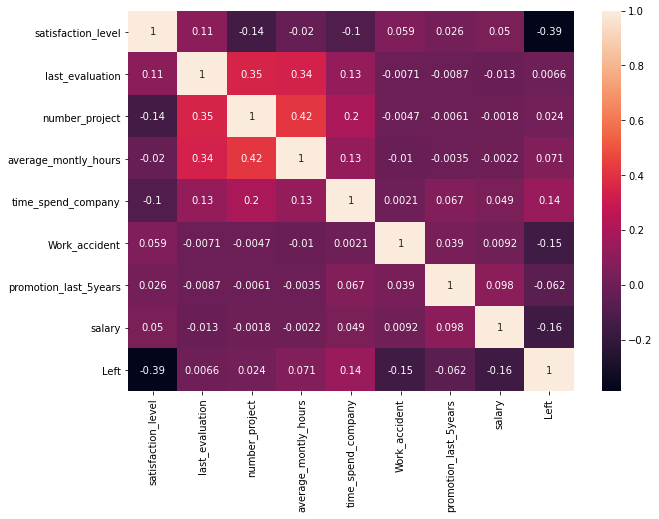

In [23]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)
plt.show()

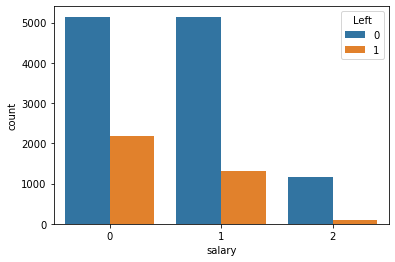

In [24]:
sal_dependence= sns.countplot(x="salary", hue="Left",data=df)

In [25]:
print("left vs total ratio for")
for x in df['salary'].unique():
    print(str(x)+" salary= "+str(round((len(df['Left'][(df['salary'] == x) & (df["Left"]==1)])/ len(df['Left'][df['salary'] == x])*100),3))+"%")

left vs total ratio for
0 salary= 29.688%
1 salary= 20.431%
2 salary= 6.629%


In [26]:
df['Work_accident'].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

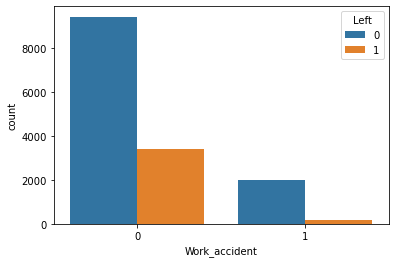

In [27]:
accident_dependence= sns.countplot(x="Work_accident", hue="Left",data=df)

In [28]:
print("left vs total ratio dependance on workplace accidents")
for x in df['Work_accident'].unique():
    print("Accident "+str(x)+": "+str(round((len(df['Left'][(df['Work_accident'] == x) & (df["Left"]==1)])/ len(df['Left'][df['Work_accident'] == x])*100),3))+"%")

left vs total ratio dependance on workplace accidents
Accident 0: 26.516%
Accident 1: 7.792%


In [29]:
df['time_spend_company'].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

In [30]:
pdc=pd.crosstab(df["time_spend_company"], df["Left"])

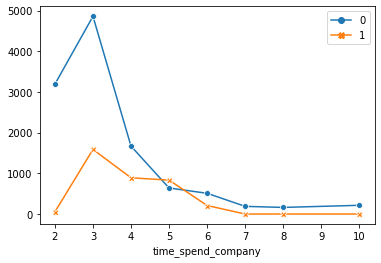

In [31]:
sns.lineplot(data=pdc, markers=True, dashes=False)

In [32]:
pdc['Attrition Rate']=round(pdc[0]/(pdc[0]+pdc[1])*100,3)

In [33]:
pdc

Left,0,1,Attrition Rate
time_spend_company,,,
2,3191,53,98.366
3,4857,1586,75.384
4,1667,890,65.194
5,640,833,43.449
6,509,209,70.891
7,188,0,100.000
8,162,0,100.000
10,214,0,100.000


In [34]:
df['satisfaction_level'].max()

1.0

In [35]:
sl=pd.crosstab(df["satisfaction_level"], df["Left"])

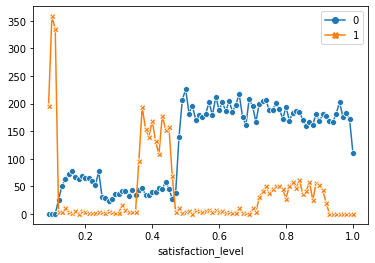

In [36]:
sns.lineplot(data=sl, markers=True, dashes=False)

In [37]:
avg_month=pd.crosstab(df["average_montly_hours"], df["Left"])

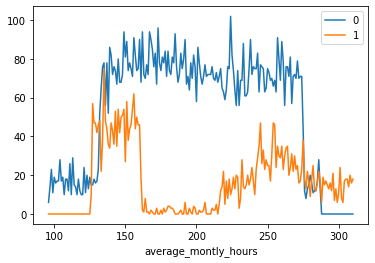

In [38]:
sns.lineplot(data=avg_month, dashes=False)

In [39]:
avg_month[avg_month[0]==0]

Left,0,1
average_montly_hours,,
288,0,6
289,0,19
290,0,15
291,0,17
292,0,15
293,0,13
294,0,16
295,0,12
296,0,21


In [40]:
avg_month[avg_month[1]==0]

Left,0,1
average_montly_hours,,
96,6,0
97,14,0
98,23,0
99,11,0
100,19,0
101,16,0
102,17,0
103,17,0
104,28,0


In [41]:
avg_month[avg_month[0]<=avg_month[1]]

Left,0,1
average_montly_hours,,
127,15,57
128,18,47
129,16,47
130,17,42
131,23,46
276,12,18
277,8,13
278,13,22
279,15,17


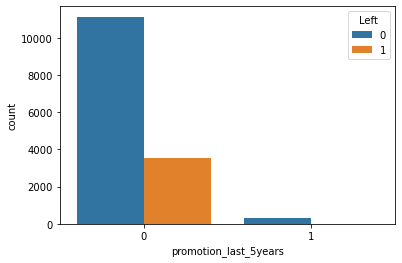

In [42]:
promotion_dependence= sns.countplot(x="promotion_last_5years", hue="Left",data=df)

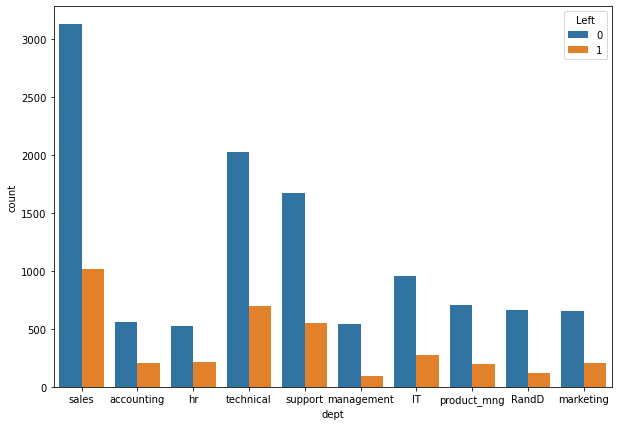

In [43]:
plt.figure(figsize=(10,7))
dept_dependence= sns.countplot(x="dept", hue="Left",data=df)
plt.show()

In [44]:
dept_dep= pd.crosstab(df["dept"], df["Left"])

In [45]:
dept_dep['Attrinion rate']=round(dept_dep[0]/(dept_dep[1]+dept_dep[0])*100,3)

In [46]:
dept_dep

Left,0,1,Attrinion rate
dept,,,
IT,954,273,77.751
RandD,666,121,84.625
accounting,563,204,73.403
hr,524,215,70.907
management,539,91,85.556
marketing,655,203,76.340
product_mng,704,198,78.049
sales,3126,1014,75.507
support,1674,555,75.101


In [47]:
last_dep= pd.crosstab(df["last_evaluation"], df["Left"])

In [48]:
last_dep

Left,0,1
last_evaluation,,
0.36,22,0
0.37,55,0
0.38,50,0
0.39,52,0
0.40,57,0
...,...,...
0.96,182,67
0.97,192,84
0.98,199,64


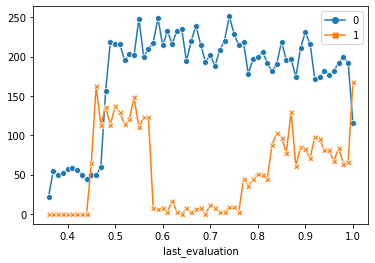

In [49]:
sns.lineplot(data=last_dep, markers=True, dashes=False)

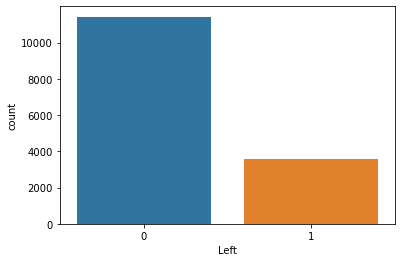

In [50]:
sns.countplot(df['Left'])

In [51]:
Attrintion_Rate=round(len(df['Left'][df['Left']==1])/len(df['Left'])*100,3)
Attrintion_Rate

23.808

In [52]:
from scipy.stats import chi2_contingency

class ChiSquare:
    def __init__(self, df):
        self.df = df
        self.p = None #P-Value
        self.chi2 = None #Chi Test Statistic
        self.dof = None
        self.dfObserved = None
        self.dfExpected = None
        
    def _print_chisquare_result(self, colX, alpha):
        result = ""
        if self.p<alpha:
            result="{0} is IMPORTANT for Prediction".format(colX)
        else:
            result="{0} is NOT an important predictor. (Discard {0} from model)".format(colX)

        print(result)
        
    def TestIndependence(self,colX,colY, alpha=0.05):
        X = self.df[colX].astype(str)
        Y = self.df[colY].astype(str)
        
        self.dfObserved = pd.crosstab(Y,X) 
        chi2, p, dof, expected = ss.chi2_contingency(self.dfObserved.values)
        self.p = p
        self.chi2 = chi2
        self.dof = dof 
        
        self.dfExpected = pd.DataFrame(expected, columns=self.dfObserved.columns, index = self.dfObserved.index)
        
        self._print_chisquare_result(colX,alpha)

In [53]:
df = pd.DataFrame(df)

In [54]:
X = df.drop(['Left'], axis=1)
ct = ChiSquare(df)
for c in X.columns:
    ct.TestIndependence(c, 'Left')

satisfaction_level is IMPORTANT for Prediction
last_evaluation is IMPORTANT for Prediction
number_project is IMPORTANT for Prediction
average_montly_hours is IMPORTANT for Prediction
time_spend_company is IMPORTANT for Prediction
Work_accident is IMPORTANT for Prediction
promotion_last_5years is IMPORTANT for Prediction
dept is IMPORTANT for Prediction
salary is IMPORTANT for Prediction


In [55]:
df_left.mean()

satisfaction_level         0.440098
last_evaluation            0.718113
number_project             3.855503
average_montly_hours     207.419210
time_spend_company         3.876505
Work_accident              0.047326
promotion_last_5years      0.005321
Left                       1.000000
dtype: float64

In [56]:
df_left.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Left
0,0.1,1.0,2,135,3,0,0,sales,low,1


In [57]:
df.mean()

satisfaction_level         0.612834
last_evaluation            0.716102
number_project             3.803054
average_montly_hours     201.050337
time_spend_company         3.498233
Work_accident              0.144610
promotion_last_5years      0.021268
salary                     0.594706
Left                       0.238083
dtype: float64

In [58]:
df.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,Left
0,0.1,0.55,4.0,135,3.0,0.0,0.0,sales,0.0,0.0
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df['number_project'].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

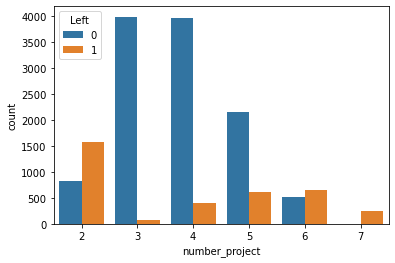

In [60]:
sns.countplot(x=df['number_project'],hue=df['Left'])

In [61]:
projects= pd.crosstab(df["number_project"], df["Left"])

In [62]:
projects['rate']=round(projects[0]/(projects[1]+projects[0])*100,3)

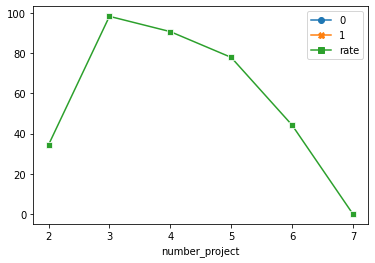

In [63]:
sns.lineplot(data=projects, markers=True, dashes=False)

In [64]:
projects['total']=projects[1]+projects[0]

In [65]:
projects

Left,0,1,rate,total
number_project,,,,
2,821,1567,34.380,2388
3,3983,72,98.224,4055
4,3956,409,90.630,4365
5,2149,612,77.834,2761
6,519,655,44.208,1174
7,0,256,0.000,256


In [66]:
work_hours_to_salary_ratio=pd.crosstab(df_left["average_montly_hours"],df_left['salary'])
work_hours_to_salary_ratio

salary,high,low,medium
average_montly_hours,,,
126,0,6,4
127,0,28,29
128,1,32,14
129,6,25,16
130,4,29,9
...,...,...,...
306,1,13,4
307,1,12,1
308,0,7,13


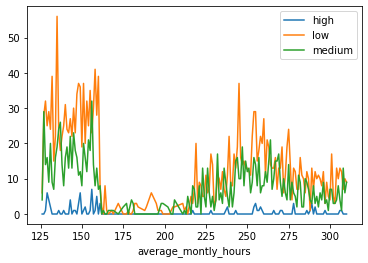

In [67]:
sns.lineplot(data=work_hours_to_salary_ratio, dashes=False)

In [68]:
projects_to_salary_ratio=pd.crosstab(df_left["number_project"],df_left['salary'])
projects_to_salary_ratio

salary,high,low,medium
number_project,,,
2,46,966,555
3,3,37,32
4,2,249,158
5,15,371,226
6,13,405,237
7,3,144,109


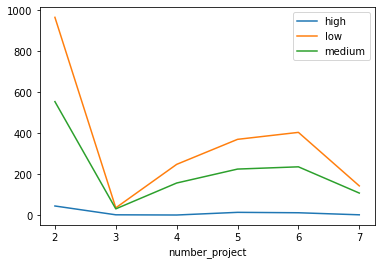

In [69]:
sns.lineplot(data=projects_to_salary_ratio, dashes=False)

In [70]:
X=pd.get_dummies(X,columns=['dept'])

In [71]:
Y=df['Left']

In [72]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [73]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=123)

In [74]:
# Modelling Algorithms
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [75]:
models = [LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB() , LinearDiscriminantAnalysis() , 
        QuadraticDiscriminantAnalysis()]

model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB', 'LinearDiscriminantAnalysis','QuadraticDiscriminantAnalysis']

f1 = []
a1=[]
a2=[]

for model in range(len(models)):
    clf = models[model]
    clf.fit(x_train,y_train)
    pred = clf.predict(x_test)
    f1.append(sklearn.metrics.f1_score(pred , y_test))
    a1.append(sklearn.metrics.accuracy_score(pred , y_test))
compare = pd.DataFrame({'Algorithm' : model_names , 'F1_score' : f1,'accuracy' : a1})
compare

d:\python\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
d:\python\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


,Algorithm,F1_score,accuracy
0,LogisticRegression,0.432561,0.787778
1,LinearSVM,0.352490,0.774667
2,rbfSVM,0.888994,0.948000
3,KNearestNeighbors,0.867191,0.936222
4,RandomForestClassifier,0.975985,0.988889
5,DecisionTree,0.953499,0.978000
6,GradientBoostingClassifier,0.944738,0.974444
7,GaussianNB,0.572299,0.719333
8,LinearDiscriminantAnalysis,0.407918,0.780667
9,QuadraticDiscriminantAnalysis,0.770192,0.885556


In [76]:
rfc=RandomForestClassifier(random_state=123)
rfc.fit(x_train,y_train)
predict_train= rfc.predict(x_train)
predict_test= rfc.predict(x_test)

In [77]:
print("Train Accuracy: "+ str(round(metrics.accuracy_score(y_train,predict_train),3)*100))
print("Test Accuracy: "+ str(round(metrics.accuracy_score(y_test,predict_test),3)*100))

print("Train F1: "+ str(round(metrics.f1_score(y_train,predict_train),3)*100))
print("Test F1: "+ str(round(metrics.f1_score(y_test,predict_test),3)*100))

Train Accuracy: 100.0
Test Accuracy: 99.0
Train F1: 100.0
Test F1: 97.8


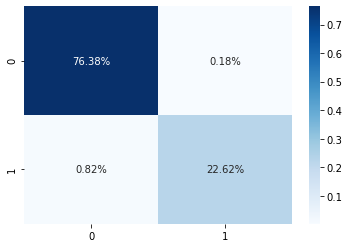

In [78]:
cm=metrics.confusion_matrix(y_test,predict_test)
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

In [79]:
import pickle
with open('Employee_attrition_model.pickle','wb') as f:
    pickle.dump(rfc,f)

In [80]:
import json
columns={
    'data_columns': [col.lower() for col in X.columns]
}
with open('Employee_attrition_columns_copy.json',"w") as f:
    f.write(json.dumps(columns))

In [81]:
with open('Employee_attrition_scaler.pickle','wb') as f:
    pickle.dump(sc,f)